In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings


In [3]:
data = pd.read_csv('./Data/properties_cleaned.csv')
print(f"Total rows before cleaning: {len(data)}")


Total rows before cleaning: 5346


In [6]:

# Filter the DataFrame for a specific region
df_brussels = data[data['Region'] == 'Brussels']
df_flanders = data[data['Region'] == 'Flanders']
df_Wallonie =data[data['Region'] == 'Wallonie']
print('Number of observation data before removing the outliers in Brussels is',df_brussels['Region'].count())
print('Number of observation data before removing the outliers in Flanders is',df_flanders['Region'].count())
print('Number of observation data before removing the outliers in Wallonia is',df_Wallonie['Region'].count())

Number of observation data before removing the outliers in Brussels is 2783
Number of observation data before removing the outliers in Flanders is 2074
Number of observation data before removing the outliers in Wallonia is 489


In [9]:
###### General info #########
data_Houses = data[data['PropertySubtype']== 'HOUSE']
data_Apartments = data[data['PropertySubtype']== 'APARTMENT']
avg_price_Houses = round(data_Houses['Price'].mean(),0)
avg_price_Apartment = round(data_Apartments['Price'].mean(),0)
print('The average prices of houses over belgium before removing the outliers is',avg_price_Houses,'€')
print('The average prices of apartments over belgium before removing the outliers is',avg_price_Apartment, '€')

The average prices of houses over belgium before removing the outliers is 503574.0 €
The average prices of apartments over belgium before removing the outliers is 355545.0 €


## Inter-Quartile Range (IQR) proximity rule.
The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers
where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 – Q1


In [11]:
################################  outliers For Houses  ######################################
### Finding the IQR
percentile25 = data_Houses['Price'].quantile(0.25) #---> Q1
percentile75 = data_Houses['Price'].quantile(0.75) #---> Q3
IQR = percentile75-percentile25
## Finding the upper and lower limits
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5*  IQR # --> 1 instead of 1.5 as the values I have is positives
print(f'The upper limit for Houses is {upper_limit} €')
print(f'The lower limit for Houses is {lower_limit} €')
Upper_outlier_excluded = data_Houses[data_Houses['Price'] > upper_limit]   # change the number to ( upper limit and check)
Lower_outlier_excluded = data_Houses[data_Houses['Price'] < lower_limit]   

data_H_no_outlier = data_Houses[data_Houses['Price'] < upper_limit]   # change the number to ( upper limit and check)
data_H_no_outlier.shape

The upper limit for Houses is 1026500.0 €
The lower limit for Houses is -137500.0 €


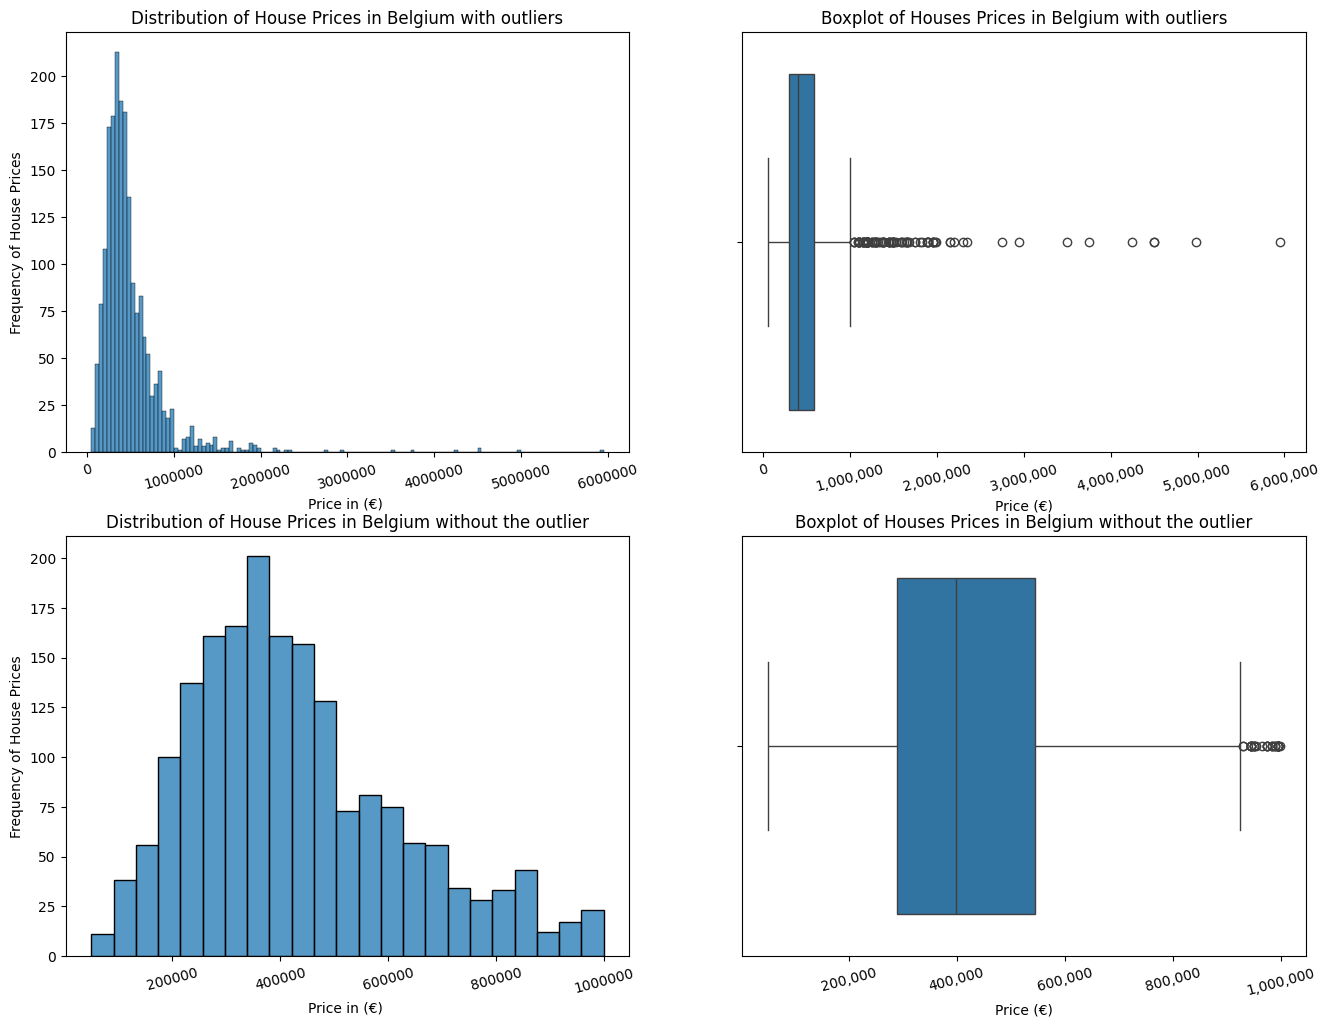

In [12]:
warnings.filterwarnings('ignore')
# Distribution with outlier
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.histplot(data_Houses['Price'])
plt.title('Distribution of House Prices in Belgium with outliers')
plt.ylabel('Frequency of House Prices')
plt.xlabel('Price in (€) ')
plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=15)

# Boxplot with outlier
plt.subplot(2,2,2)
sns.boxplot(x=data_Houses['Price'])
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Boxplot of Houses Prices in Belgium with outliers')
plt.xlabel('Price (€)')
plt.xticks(rotation=15)

# Distribution After removing outlier
plt.subplot(2,2,3)
sns.histplot(data_H_no_outlier['Price'])
plt.title('Distribution of House Prices in Belgium without the outlier')
plt.ylabel('Frequency of House Prices')
plt.xlabel('Price in (€) ')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=15) 

# Boxplot with After removing outlier
plt.subplot(2,2,4)
sns.boxplot(x=data_H_no_outlier['Price'])
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Boxplot of Houses Prices in Belgium without the outlier')
plt.xlabel('Price (€)')
plt.xticks(rotation=15)
plt.show()


In [14]:
################################  outliers For Apartment  ######################################
### Finding the IQR
percentile25_A = data_Apartments['Price'].quantile(0.25) #---> Q1
percentile75_A = data_Apartments['Price'].quantile(0.75) #---> Q3
IQR = percentile75-percentile25
## Finding the upper and lower limits
upper_limit_A = percentile75_A + 1.5 * IQR
lower_limit_A =  percentile25_A - 1.5 * IQR   #percentile25_A - 1*IQR # --> 1 instead of 1.5 as the values I have is positives
print(f'The upper limit for Apartments is {upper_limit_A} €')
print(f'The lower limit for Apartments is {lower_limit_A} €')
data_A_no_outlier = data_Apartments[data_Apartments['Price'] < upper_limit_A]   # change the number to ( upper limit and check)
data_A_no_outlier.shape

The upper limit for Apartments is 831500.0 €
The lower limit for Apartments is -207500.0 €


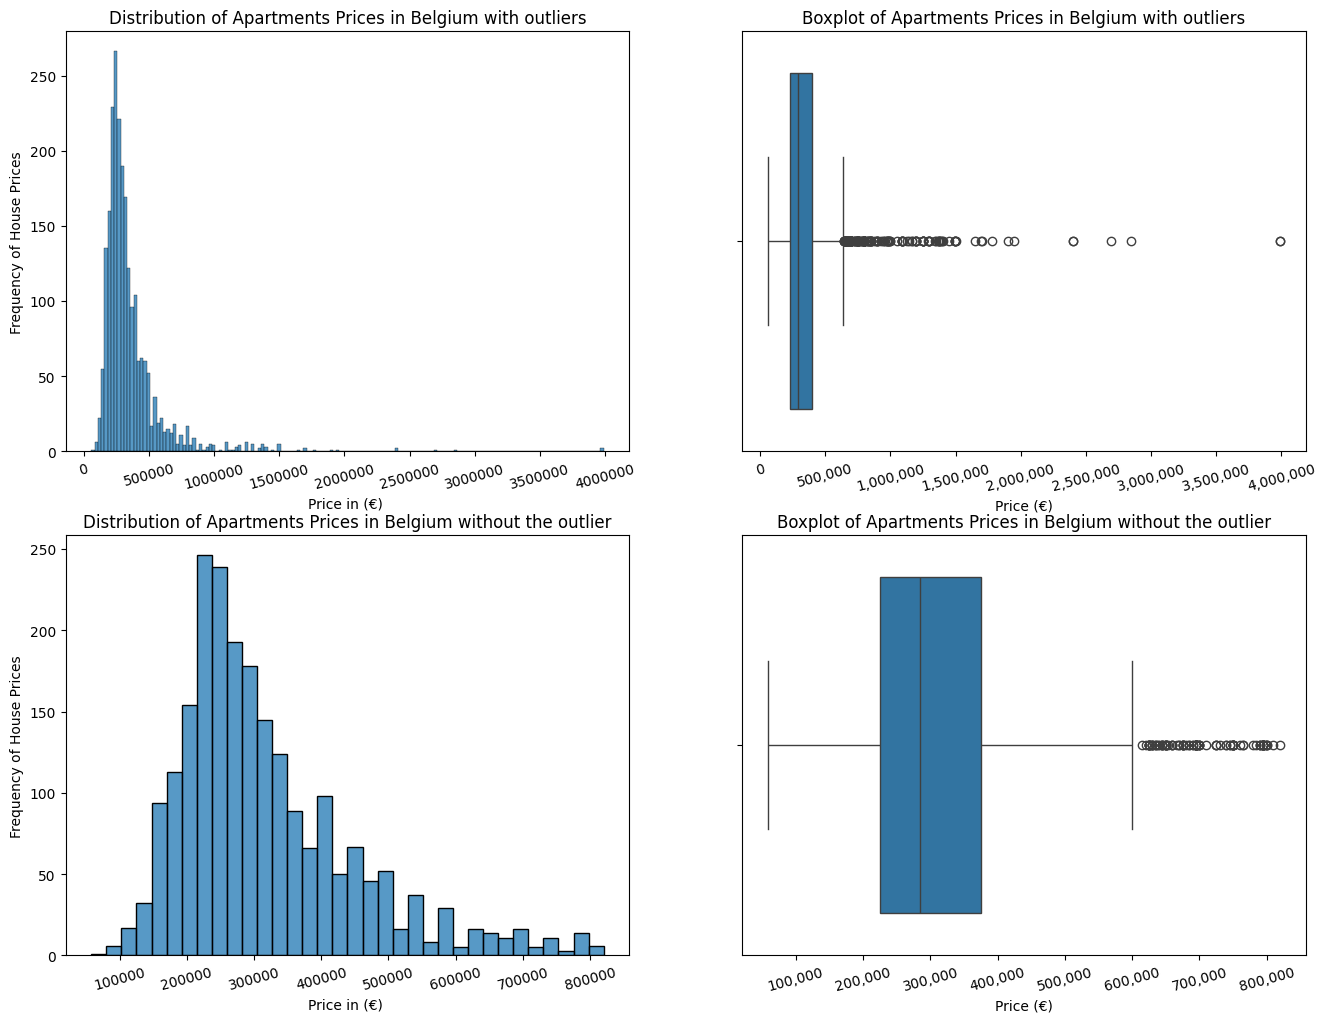

In [15]:
warnings.filterwarnings('ignore')
# Distribution with outlier
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.histplot(data_Apartments['Price'])
plt.title('Distribution of Apartments Prices in Belgium with outliers')
plt.ylabel('Frequency of House Prices')
plt.xlabel('Price in (€) ')
plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=15)

# Boxplot with outlier
plt.subplot(2,2,2)
sns.boxplot(x=data_Apartments['Price'])
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Boxplot of Apartments Prices in Belgium with outliers')
plt.xlabel('Price (€)')
plt.xticks(rotation=15)

# Distribution After removing outlier
plt.subplot(2,2,3)
sns.histplot(data_A_no_outlier['Price'])
plt.title('Distribution of Apartments Prices in Belgium without the outlier')
plt.ylabel('Frequency of House Prices')
plt.xlabel('Price in (€) ')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=15) 

# Boxplot with After removing outlier
plt.subplot(2,2,4)
sns.boxplot(x=data_A_no_outlier['Price'])
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Boxplot of Apartments Prices in Belgium without the outlier')
plt.xlabel('Price (€)')
plt.xticks(rotation=15)
plt.show()


In [21]:
# Saving the houses and apartments data after removing outliers
# you can specify the path
data_H_no_outlier.to_csv('Results/final_Data_results/houses_no_outliers.csv', index=False)  
data_A_no_outlier.to_csv('Results/final_Data_results/apartments_no_outliers.csv', index=False)
# Saving the combined data to a single CSV file
data_H_no_outlier['Property_Type'] = 'House'
data_A_no_outlier['Property_Type'] = 'Apartment'
combined_data_no_outlier = pd.concat([data_H_no_outlier, data_A_no_outlier])
combined_data_no_outlier.to_csv('Results/final_Data_results/houses_and_apartments_no_outliers.csv', index=False)

# calculating the percentages of the outliers " Houses"
total_houses = data_Houses.shape[0]
Upper_outlier_excluded_H = data_Houses[data_Houses['Price'] > upper_limit]   # change the number to ( upper limit and check)
Lower_outlier_excluded_H = data_Houses[data_Houses['Price'] < lower_limit]  
total_outliers_houses = Upper_outlier_excluded_H.shape[0] + Lower_outlier_excluded_H.shape[0]
percentage_outliers_houses = round(((total_outliers_houses / total_houses) * 100),2)
print(f"Percentage of outliers for Houses: {percentage_outliers_houses}%")

# calculating the percentages of the outliers " Apartmetns"
total_apartments = data_Apartments.shape[0]
Upper_outlier_excluded_A = data_Apartments[data_Apartments['Price'] > upper_limit_A]   # change the number to ( upper limit and check)
Lower_outlier_excluded_A = data_Apartments[data_Apartments['Price'] < lower_limit_A] 
total_outliers_apartments = Upper_outlier_excluded.shape[0] + Lower_outlier_excluded.shape[0]
percentage_outliers_apartments = round(((total_outliers_apartments / total_apartments) * 100),2)

print(f"Percentage of outliers for Apartments: {percentage_outliers_apartments}%")


Percentage of outliers for Houses: 5.44%
Percentage of outliers for Apartments: 4.55%
